In [1]:
import h5py
import numpy as np

from llama.api.options.projections import ProjectionOptions
from llama.api.options.task import AlignmentTaskOptions
from llama.task import LaminographyAlignmentTask
from llama.projections import ComplexProjections, PhaseProjections
import llama.image_processing as ip

import matplotlib.pyplot as plt
reconstruction_colormap = "bone"

In [ ]:
filepath = '/local/hruth/lamino_ci_test_data/input_data/cSAXS_projections_downsampling16.h5'

# Open the HDF5 file for reading
with h5py.File(filepath, 'r') as h5file:
    # Read the datasets
    complex_projections = h5file['complex_projections'][:]
    angles = h5file['angles'][:]

# Sort inputs
idx_sort = np.argsort(angles)
angles = angles[idx_sort]
complex_projections = complex_projections[idx_sort]

projection_options = ProjectionOptions()
complex_projections = ComplexProjections(complex_projections, angles, projection_options) # [:, 30:70, 20:60]

task_options = AlignmentTaskOptions()
task = LaminographyAlignmentTask(complex_projections, task_options)

In [ ]:
task.get_cross_correlation_shift()
# task.apply_staged_shift()

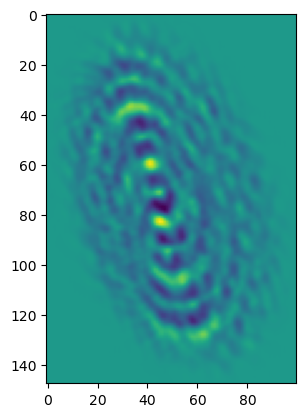

In [3]:
complex_projections.plot_sum_of_projections(np.angle)

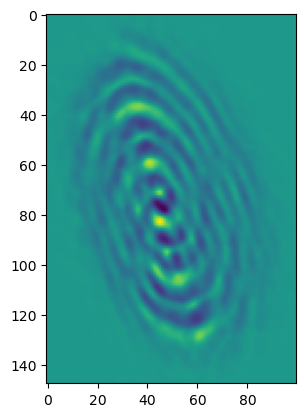

In [4]:
task.apply_staged_shift()
complex_projections.plot_sum_of_projections(np.angle)

Next:
- Add linear image shifting
- Make it easy to switch between the 16x downsampled and full res images